In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import sweetviz as sv
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
cars= pd.read_csv("C:\\Users\\prasa\\Downloads\\ToyotaCorolla.csv")
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
cars.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

# EDA Process

In [78]:
cars1=cars.iloc[:,[2,3,6,8,13,15,17]]
cars1.head()  

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [79]:
#Renaming the columns
cars2=cars1.rename({'Age_08_04': 'Age'}, axis=1)
cars2.head()

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [80]:
#finding Duplicates
cars2[cars2.duplicated()]   # means there is one duplicate value

,Price,Age,KM,HP,Doors,Gears,Weight
113,24950,8,13253,116,5,5,1320


In [81]:
cars3= cars2.drop_duplicates()
cars3

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015


In [82]:
cars3.isna().sum()   #there are no missing values

Price     0
Age       0
KM        0
HP        0
Doors     0
Gears     0
Weight    0
dtype: int64

In [83]:
cars3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   Doors   1435 non-null   int64
 5   Gears   1435 non-null   int64
 6   Weight  1435 non-null   int64
dtypes: int64(7)
memory usage: 89.7 KB


In [84]:
cars3.describe()

,Price,Age,KM,HP,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,4.032753,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,5.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,6.000000,1615.000000


<AxesSubplot:>

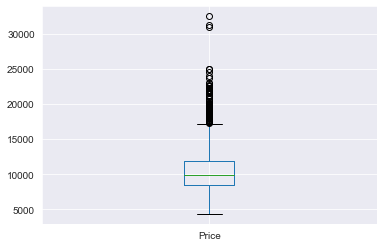

In [85]:
#Outlier Detection
cars3.boxplot(column='Price')      #there are mutiple outliers

<AxesSubplot:>

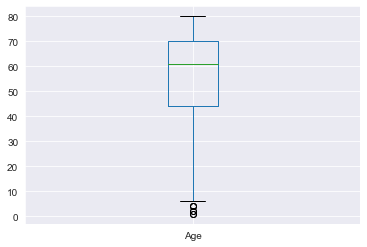

In [86]:
cars3.boxplot(column='Age')    #there are outliers

In [19]:
%matplotlib inline

<AxesSubplot:>

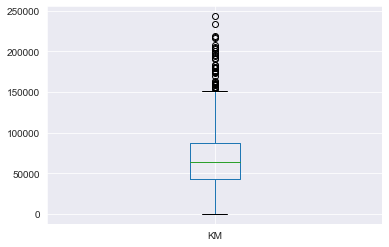

In [87]:
cars3.boxplot(column='KM')       #ther are outliers

<AxesSubplot:>

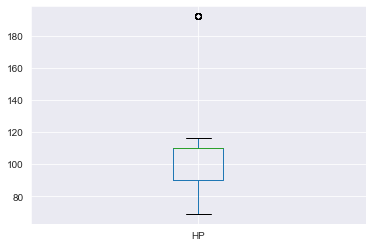

In [88]:
cars3.boxplot(column='HP')      #there is one outlier

<AxesSubplot:>

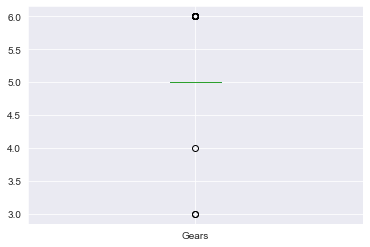

In [89]:
cars3.boxplot(column='Gears')

<AxesSubplot:>

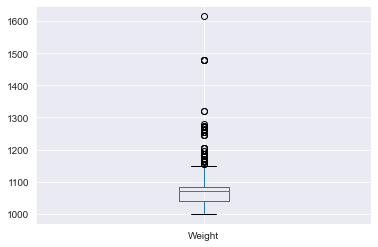

In [90]:
cars3.boxplot(column='Weight')

# Correlation

In [91]:
cars3.corr()  #from this corrrelation matrix we understood that there no collinearity between input variables.

,Price,Age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.183604,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.091803,0.209642,0.087143
Doors,0.183604,-0.146929,-0.035193,0.091803,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.301734,0.021238,1.000000


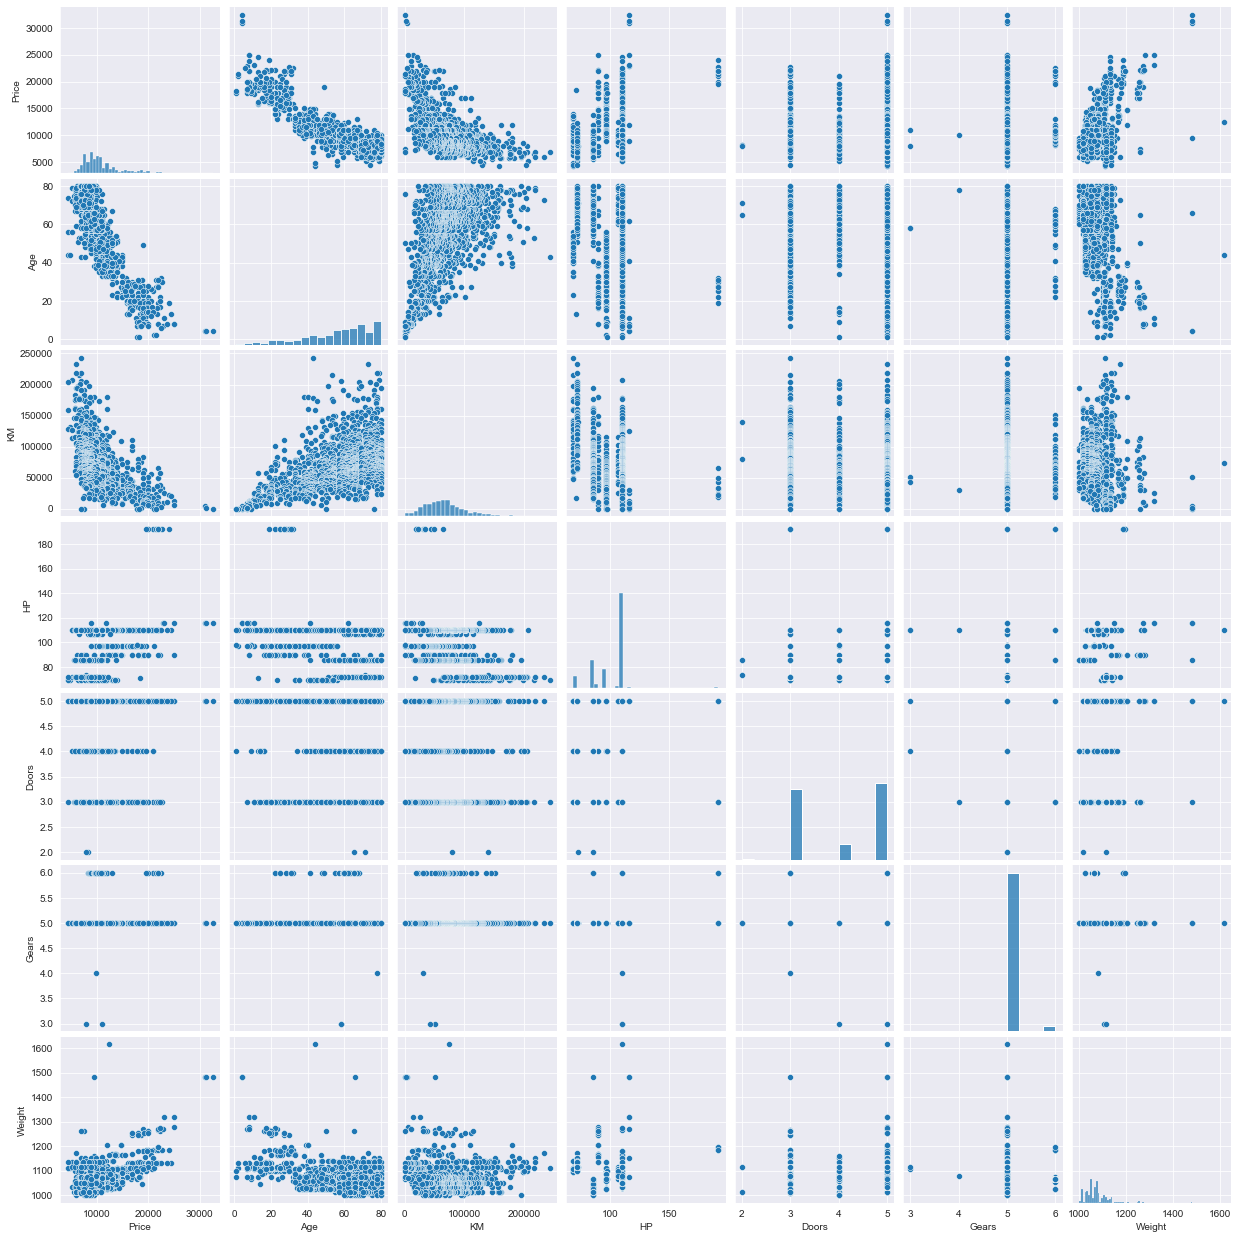

In [92]:
sns.set_style(style='darkgrid')
sns.pairplot(cars3)

# Model Building


In [93]:
model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight', data=cars3).fit()
model.params   #finding Parameters

Intercept   -6838.987234
Age          -122.288250
KM             -0.019928
HP             28.327782
Doors          -8.715826
Gears         625.297840
Weight         18.455133
dtype: float64

In [95]:
print(model.tvalues, '\n', model.pvalues)    #finding P-values

Intercept    -5.204801
Age         -46.774676
KM          -16.490150
HP           10.840831
Doors        -0.218061
Gears         3.169455
Weight       22.141591
dtype: float64 
 Intercept     2.225269e-07
Age          2.214963e-290
KM            4.677262e-56
HP            2.271374e-26
Doors         8.274129e-01
Gears         1.559656e-03
Weight        1.263222e-93
dtype: float64


In [96]:
#Doors have insignificant values as they have p-values greater than 0.05

In [97]:
#finding R-squared values
(model.rsquared, model.rsquared_adj)

(0.861594698486665, 0.8610131636063569)

In [ ]:
#Building Simple Linear Regression model for Doors

In [98]:
lrm_Doors=smf.ols('Price~Doors', data=cars3).fit()
print(lrm_Doors.tvalues, '\n', lrm_Doors.pvalues)   #Doors has significant pvalue

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


# Model Validation

In [99]:
#Collinearity checking by calculating VIF
rsq_a=smf.ols('Age~KM+HP+Doors+Gears+Weight', data=cars3).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_k=smf.ols('KM~Age+HP+Doors+Gears+Weight', data=cars3).fit().rsquared
vif_k=1/(1-rsq_k)

rsq_h=smf.ols('HP~Age+KM+Doors+Gears+Weight', data=cars3).fit().rsquared
vif_h=1/(1-rsq_h)

rsq_d=smf.ols('Doors~Age+KM+HP+Gears+Weight', data=cars3).fit().rsquared
vif_d=1/(1-rsq_d)

rsq_g=smf.ols('Gears~Age+KM+HP+Doors+Weight', data=cars3).fit().rsquared
vif_g=1/(1-rsq_g)

rsq_w=smf.ols('Weight~Age+KM+HP+Doors+Gears', data=cars3).fit().rsquared
vif_w=1/(1-rsq_w)

#storing above vif values in a data frame
d1={'Variables': ['Age','KM','HP','Doors','Gears','Weight'], 
    'VIF':[vif_a,vif_k,vif_h,vif_d,vif_g,vif_w]}

Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.866057
1,KM,1.626264
2,HP,1.214147
3,Doors,1.148708
4,Gears,1.096575
5,Weight,1.502749


In [ ]:
# all the variables has VIF<10, means there is no collinearity

C:\Users\prasa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


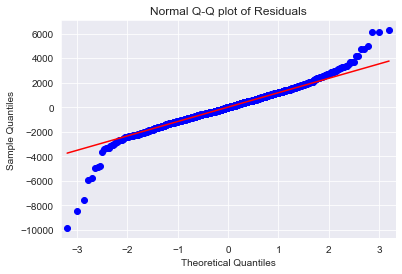

In [100]:
#Residual Analysis
qqplot= sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [101]:
list(np.where(model.resid<-6000))   #Outlier point from above Q-Q plot

[array([220, 600, 959], dtype=int64)]

In [102]:
list(np.where(model.resid>6000))    #Outlier point from above Q-Q plot

[array([109, 146, 522], dtype=int64)]

In [103]:
#Plot for Homoscedosticity
def get_standardized_values( vals ): return (vals - vals.mean())/vals.std()

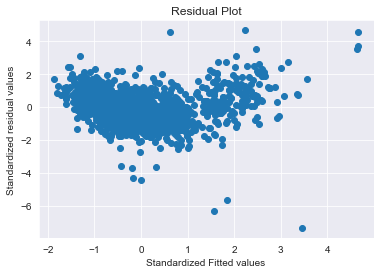

In [104]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

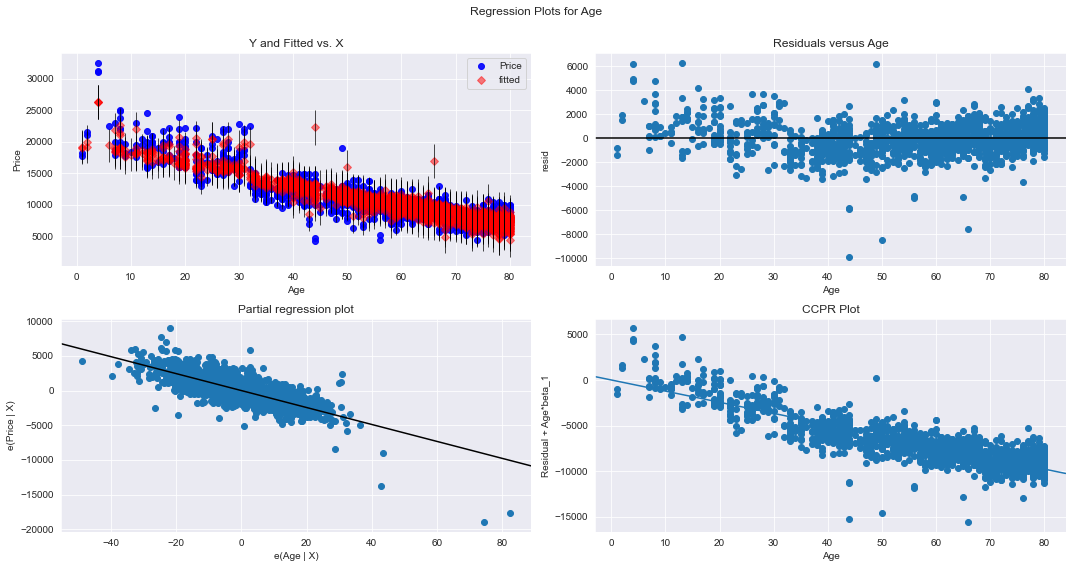

In [105]:
#Residual Vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

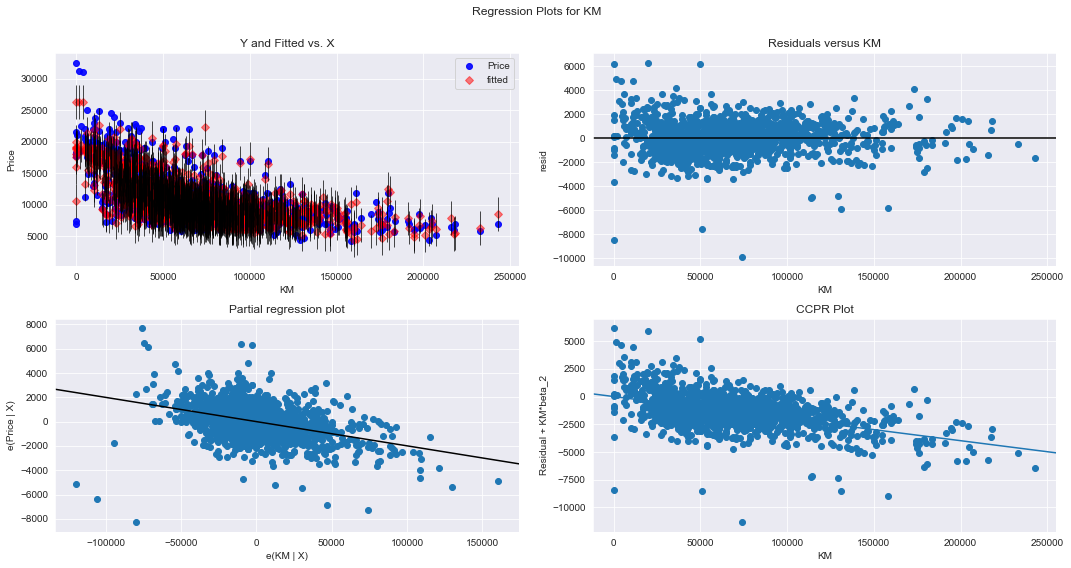

In [106]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

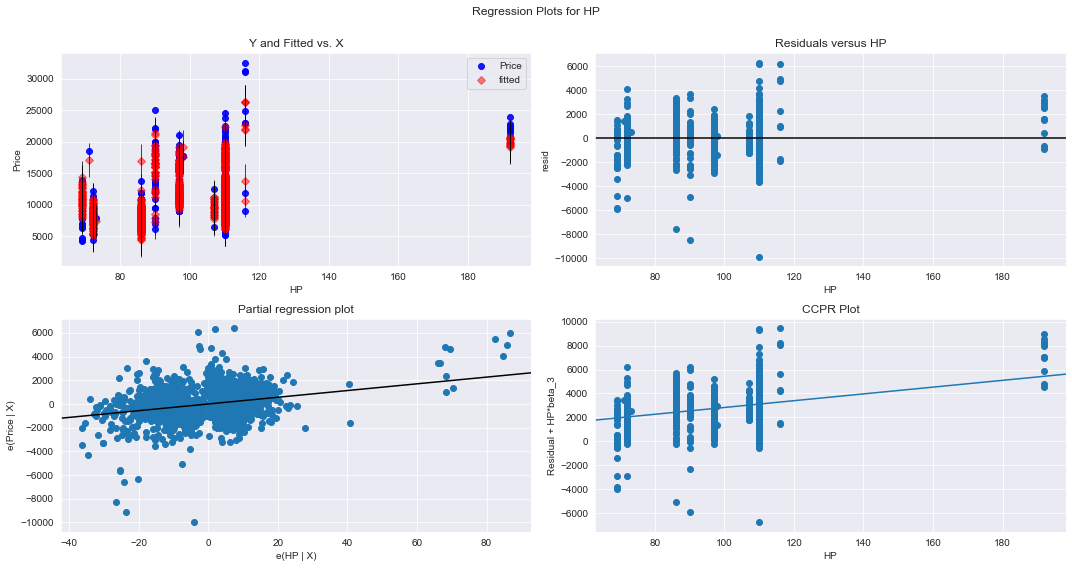

In [107]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

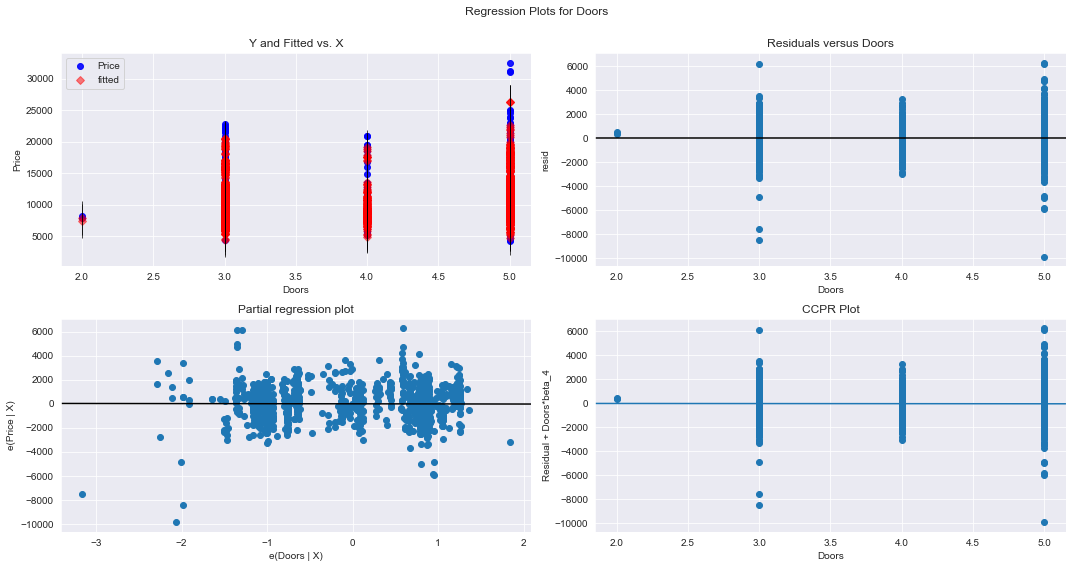

In [108]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

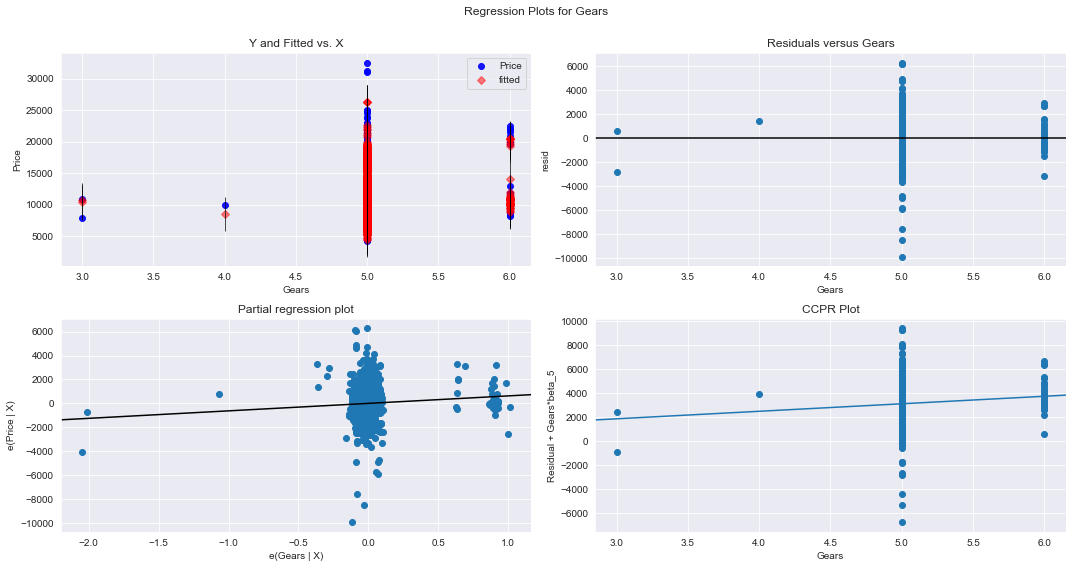

In [109]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

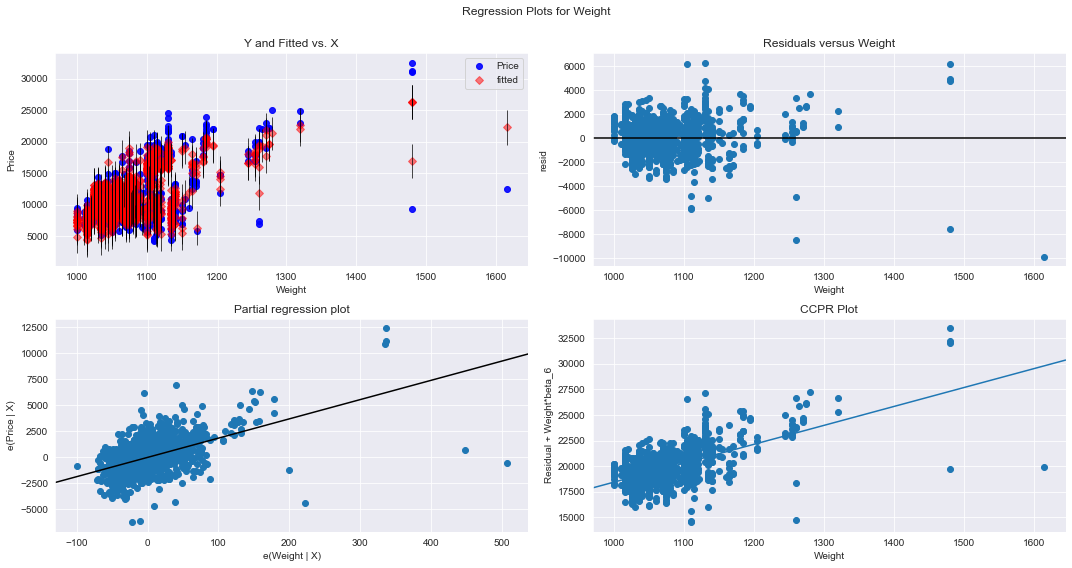

In [110]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [111]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Cook’s Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c   # Cook's Distance>1 means there is a Outlier Or Influencer

array([4.84834865e-03, 2.81504747e-03, 3.49062601e-03, ...,
       4.29681961e-06, 8.15626746e-04, 1.20038984e-02])

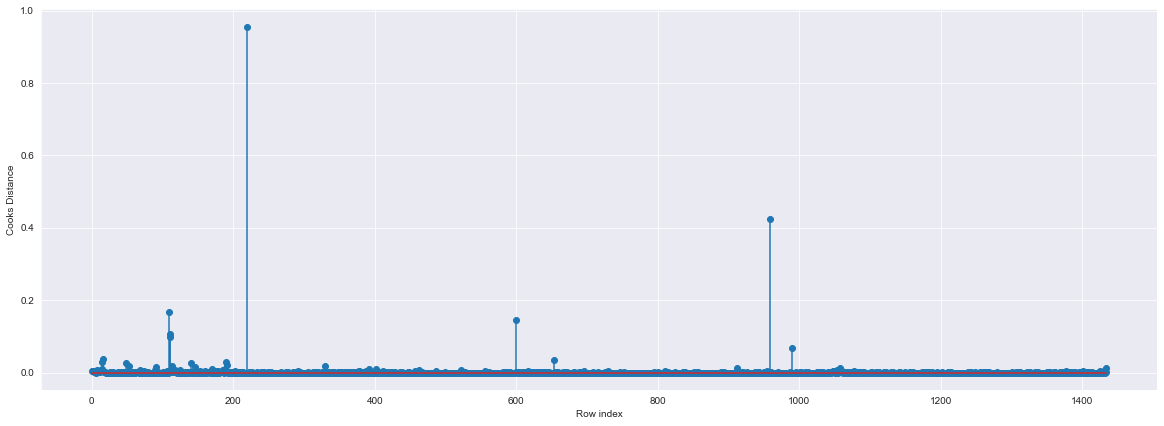

In [116]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [123]:
#Index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(220, 0.9561392473389879)

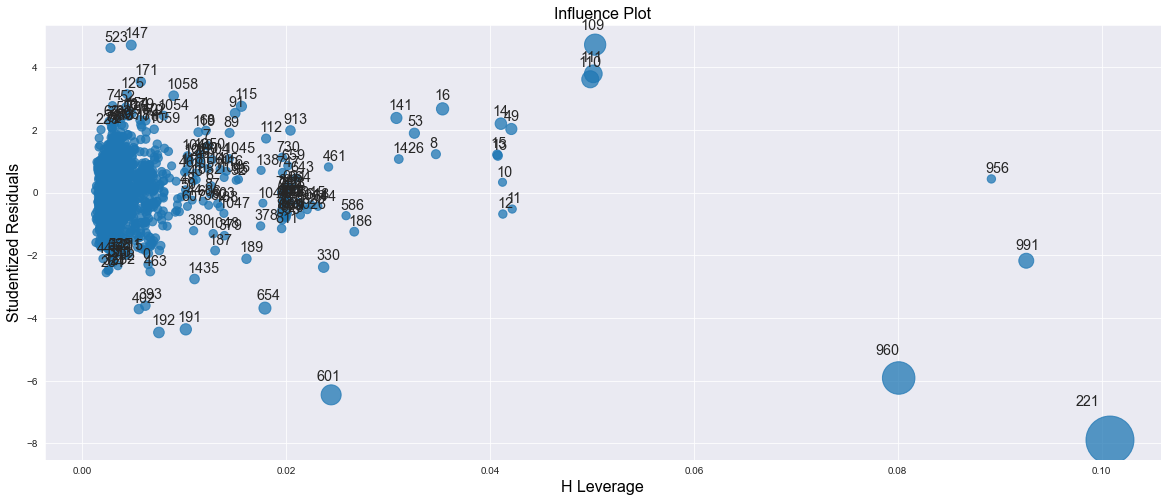

In [128]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(20,8))
fig = sm.graphics.influence_plot(model, ax= ax)

In [ ]:
#From the above plot, it is evident that the influencer data points are 109,110,221,601,960,991,956

In [129]:
k = cars3.shape[1]
n = cars3.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.016724738675958188

In [130]:
cars3[cars3.index.isin([109,110,221,601,960,991,956])]

,Price,Age,KM,HP,Doors,Gears,Weight
109,32500,4,1,116,5,5,1480
110,31000,4,4000,116,5,5,1480
221,12450,44,74172,110,5,5,1615
601,7500,50,1,90,3,5,1260
956,10950,58,51421,110,5,3,1105
960,9390,66,50806,86,3,5,1480
991,7950,58,43000,110,4,3,1114


# Improving the Model

In [131]:
#Discard the data points which are influencers and reasign the row number (reset_index())
cars4=cars3.drop(cars3.index[[109,110,221,601,960,991,956]],axis=0).reset_index()
cars4.head()

,index,Price,Age,KM,HP,Doors,Gears,Weight
0,0,13500,23,46986,90,3,5,1165
1,1,13750,23,72937,90,3,5,1165
2,2,13950,24,41711,90,3,5,1165
3,3,14950,26,48000,90,3,5,1165
4,4,13750,30,38500,90,3,5,1170


In [137]:
cars4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   1428 non-null   int64
 1   Price   1428 non-null   int64
 2   Age     1428 non-null   int64
 3   KM      1428 non-null   int64
 4   HP      1428 non-null   int64
 5   Doors   1428 non-null   int64
 6   Gears   1428 non-null   int64
 7   Weight  1428 non-null   int64
dtypes: int64(8)
memory usage: 89.4 KB


In [133]:
#Checking Final model
final_model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight', data=cars4).fit()
(final_model.rsquared, final_model.aic)

(0.858874129741741, 24599.48447475304)

In [134]:
final_model_influence = final_model.get_influence()
(c1, _) = final_model_influence.cooks_distance
c1  

array([4.74488290e-03, 2.67895244e-03, 3.35465412e-03, ...,
       3.35661865e-06, 8.57658062e-04, 1.17870854e-02])

In [135]:
(np.argmax(c1),np.max(c1))

(218, 0.9279532649893047)

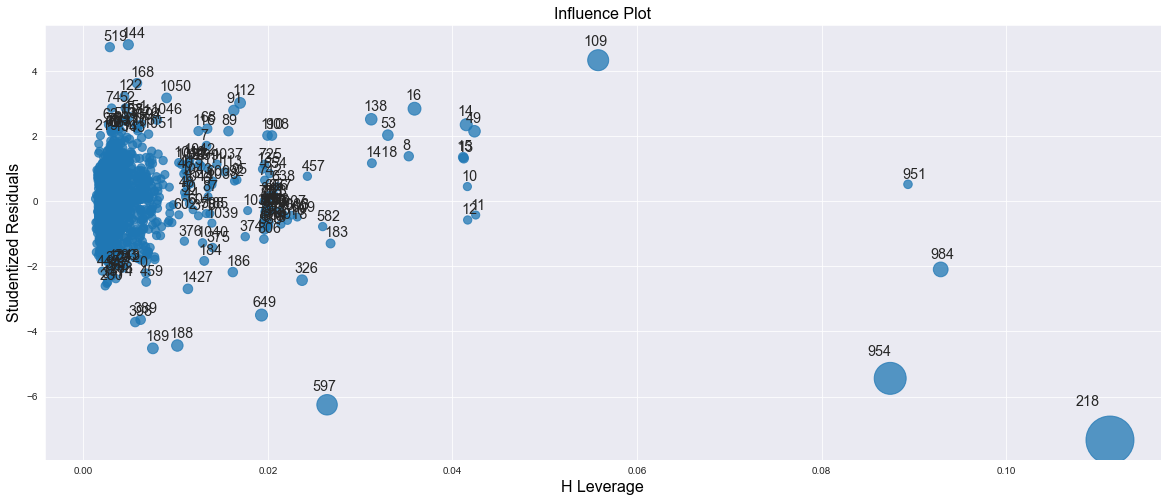

In [136]:
fig, ax = plt.subplots(figsize=(20,8))
fig = sm.graphics.influence_plot(final_model, ax= ax)

In [138]:
cars5=cars4.drop(cars4.index[[218,954,984,597,951,109,519,144]],axis=0).reset_index()
cars5.head()

,level_0,index,Price,Age,KM,HP,Doors,Gears,Weight
0,0,0,13500,23,46986,90,3,5,1165
1,1,1,13750,23,72937,90,3,5,1165
2,2,2,13950,24,41711,90,3,5,1165
3,3,3,14950,26,48000,90,3,5,1165
4,4,4,13750,30,38500,90,3,5,1170


In [141]:
#Checking Final model
final_model1=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight', data=cars5).fit()
(final_model1.rsquared, final_model1.aic)

(0.8732328692076339, 24259.823976991687)

In [ ]:
#after removing multiple influencer points, rsquared value is improved

In [142]:
#Predicting for new data
new_data=pd.DataFrame({'Age':20,"KM":50000,"HP":100,"Doors":4,"Gears":5,"Weight":1000},index=[0])
new_data

,Age,KM,HP,Doors,Gears,Weight
0,20,50000,100,4,5,1000


In [143]:
final_model1.predict(new_data)  

0    13712.716761
dtype: float64

In [144]:
pred_y = final_model1.predict(cars5)
pred_y

0       16712.790448
1       16155.717847
2       16710.183177
3       16343.497187
4       16190.010290
            ...     
1415     8877.460853
1416     8351.175335
1417     8509.606660
1418     8627.595428
1419    10928.048286
Length: 1420, dtype: float64